# Projeto de Ciências de Dados

##### Professor: Francisco Rodrigues
##### Aluna: Andressa Contarato Rodrigues

O desenvolvimento desse projeto se dará através dos seguintes passos:
    
    * Pré-processamento
    
    1- Formulação do problema e preparo dos dados
    2 - Limpeza e normalização dos dados
    3- Transformação para valores numéricos (one-hot-encoding) se precisar.
    
    * Classificação (classificar de acordo com a qualidade)
    
    4 - kvizinhos (encontre o melhor k usando validação cruzada)
    5 - Árvore de decisão
    6 - Naive Bayes
    7 - SVM (encontre o melhor C usando validação cruzada)
    8 - Random Forest (encontre o melhor número de estimadores usando validação cruzada)
    
    * Ordenação dos atributos
    
    9 - Para o algoritmo random forest, mostre a importância de cada atributo.
    
    * Regressão
    
    10 - Usando regressão linear, tente predizer a porcentagem de álcool.
    11 - Compare os métodos Lasso, Ridge Regression, calculando o erro quadrático médio em função dos seus parâmetros (alpha).
    
    * Conclusão
    
    12 - Discussão dos resultados obtidos

<span style="color:yellow"> Objetivo: Vamos considerar o problema de classificação dos de vinhos disponível no portal Kaggle (link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).
Ou seja, objetivamos construir um projeto para classificar os dados e posterior submissão, de modo a verificar o quão preciso são nossos resultados comparados com soluções de outros usuários. 
Vamos mostrar todas as fases do projeto e os resultados, mas lembramos que essa é uma possível solução. </span>

Nosso objetivo é classificar o vinho de acordo com a qualidade dele

## Formulação do problema e leitura dos dados

Vamos considerar a base de dados de vinhos.

Atributos contidos nos dados

1 - fixed acidity: a maioria dos ácidos envolvidos no vinho ou fixa ou não volátil (não evapore rapidamente) 

2 - volatile acidity: a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um sabor desagradável ao vinagre 

3 - citric acid: encontrado em pequenas quantidades, o ácido cítrico pode adicionar 'frescura' e sabor aos vinhos

4 - residual sugar: a quantidade de açúcar restante após o término da fermentação, é raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro são considerados doces 

5 - chlorides: a quantidade de sal no vinho 

6 - free sulfur dioxide: a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como um gás dissolvido) e o íon bissulfito; impede o crescimento microbiano e a oxidação do vinho 

7 - total sulfur dioxide: formas livres e ligadas de S02; em baixas concentrações, o SO2 é principalmente indetectável no vinho, mas em concentrações livres de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho 

8 - density: a densidade da água no vinho é próxima à da água, dependendo da porcentagem de teor de álcool e açúcar 

9 - pH: descreve como um vinho é ácido ou básico em uma escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos tem entre 3-4 na escala de pH 

10 - sulphates: um aditivo de vinho que pode contribuir para os níveis de gás dióxido de enxofre (S02), que atua como antimicrobiano e antioxidante 

11 - alcohol: a percentagem de álcool do vinho 

12 - quality: variável de saída de qualidade (com base em dados sensoriais, pontuação entre 0 e 10)

Importando os pacotes necessários

In [52]:
# Dentro da linguagem pandas ha vários métodos e funções pré-definidas, porém muitas das quais vamos utilizar aqui, 
# temos que 'chamar' através de uma estrutura import ou se for um módulo 
# de uma biblioteca, através do from.

import matplotlib.pyplot as plt # módulo matplotlib para construcao de graficos
import numpy as np # biblioteca pandas usada para manipulação de dados, tb da forma big data e construção de métricas
import os # biblioteca python para setar egerenciar arquivos localmente
import pandas as pd # biblioteca Pandas é usada para manipulação de dados
import random # módulo do Numpy de geração de números randomicos
from sklearn.preprocessing import StandardScaler # módulo do sklearn para padronização dos dados do sklearn para padronizacao e normalizacao dos dados
from sklearn.model_selection import train_test_split # módulo do sklearn para separar dados de teste e de treino
from sklearn.model_selection import cross_validate # módulo sklearn para validação cruzada
from sklearn.neighbors import KNeighborsClassifier # módulo sklearn para calcular o modelo de machine learning knn
from sklearn import tree # importando o módulo do sklearn do modelo de árvore de decisão
from sklearn.metrics import accuracy_score # para calculo da acurácia em módulos que nao se tem implementados
from sklearn import tree # importando módulo de visualização da árvore
from sklearn.naive_bayes import GaussianNB # módulo do sklearn para implementação do modelo de Naive Bayes com distribuição normal
from sklearn import metrics # módulo do sklearn para computação de métricas dentro do modelo de naive bayes
from sklearn.naive_bayes import BernoulliNB # módulo do sklearn para implementação do modelo de Naive Bayes com distribuição bernoulli
from sklearn.ensemble import RandomForestClassifier # módulo do sklearn para construção do modelo de Random Forest
from sklearn.linear_model import LinearRegression # módulo sklearn para regressao linear
from sklearn.decomposition import PCA # módulo sklearn para construção da pca
from sklearn.model_selection import train_test_split # módulo sklearn para construcao do split para dataset de teste e de treino num modelo de regressao linear
from sklearn.linear_model import Lasso # módulo sklearn para importacao da métrica de lasso
from sklearn.metrics import mean_squared_error # módulo sklear para importacao da estatistica de teste erro quadrático médio
from sklearn.metrics import r2_score # módulo sklear para importacao da estatistica de teste R2
from sklearn.linear_model import Ridge, RidgeCV # módulo sklearn para importacao da métrica de ridge


1- Formulação do problema e preparo dos dados

In [2]:
random.seed(42) # define a semente (importante para reproduzir os resultados)

dir_file = '/home/andressa/Desktop/' # criando um objeto do meu diretorio do dataset
os.chdir(dir_file) # setando aonde meu dataset está
df = pd.read_csv('winequality-red.csv') # importando os dados

print("Número de linhas e colunas no dataset:", df.shape) # funcao de printar
attributes = list(df.columns) # construindo um objeto tipo lista para armazenar os nomes das variaveis
features_names = df.columns
df.head(10) # funcao head para mostrar uma amostra do dataset

Número de linhas e colunas no dataset: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# criando uma variavel categorica
qualidade = []
for i in range(0,df.shape[0]):
    if df.iloc[i,11] <= 4:
        qualidade.append(0)
    else:
        qualidade.append(1)
df['qualidade'] = qualidade
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


2 - Limpeza e normalização dos dados

O conjunto de dados pode apresentar valores nulos (not a number: nan). A sua identificação pode ser feita usando métodos da biblioteca Pandas.

In [4]:
df.isnull().sum().sort_values(ascending=False).head(10)

qualidade               0
quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
dtype: int64

In [5]:
df = df.dropna() # reomoção de valores faltantes

Não apresenta nenhum valor faltante

In [6]:
# Retorna True na posição em que há uma linha duplicada
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

Apresenta valor duplicado

In [7]:
# Remove as linhas duplicadas
df = df.drop_duplicates()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


Vamos verificar se as classes estão balanceadas.

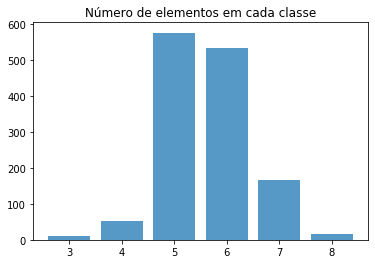

In [8]:
classes = df[df.columns[-2]] # considerando a variável quality original do dataset
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Há mais vinhos classificados como 5 e 6.

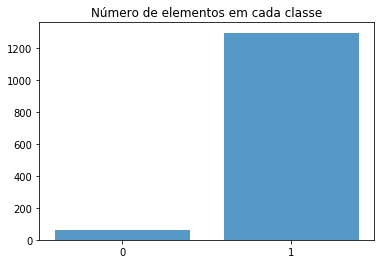

In [9]:
classes = df[df.columns[-1]] # considerando a variável criada qualidade 1 se maior que 4, 0 caso contrario
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Ou seja, há mais vinhos classificados como bons. Essa informação será importante na validação cruzada.

Análise Descritiva

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,0.953642
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,0.210336
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


Temos valores muito discrepantes entre as variaveis, vide o maximo da total sulfur dioxide com a density. E, na variável também, vide a total sulfur dioxide novamente. Necessitando de uma normalização dos dados.
Em média, a pontuação do vinho é de boa qualidade (considerando acima de 4 bom)
A variação da quality é muito pequena e a variação do total sulfur dioxide é uma das maiores.

In [11]:
# convertemos em formato numpy para facilitar a manipulacao dos dados
data = df.to_numpy() # dataframe do pandas para array numpy
nrow,ncol = data.shape # atribuindo aos objetos nrow e ncol o tamanho do conjunto de dados
y = data[:,-1] # separando a variavel target
X = data[:,0:ncol-2] # construindo o dataset de analise sem a variavel target
# retirando a quality para analisar a qualidade como y, variavel target
data = df.copy()
data.drop(['quality'],axis = 1, inplace = True)

print('Dados originais:') # mostrando a média e desvio padrao dos atributos do conjunto de dados X ja transformados
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados originais:
Media:  [ 8.31059603  0.52947756  0.2723326   2.52339956  0.08812362 15.8933039
 46.82597498  0.99670895  3.30978661  0.65870493 10.43231543]
Desvio Padrao: [1.73635062e+00 1.82963965e-01 1.95464590e-01 1.35181613e+00
 4.93586925e-02 1.04434258e+01 3.33966517e+01 1.86822940e-03
 1.54979260e-01 1.70604088e-01 1.08166727e+00]


In [ ]:
# normalização dos dados de forma a evitar problemas de escala nos atributos
scaler = StandardScaler().fit(X) # normalização dos dados
X = scaler.transform(X) # tranformação dos dados

print('Dados transformados:') # mostrando a média e desvio padrao dos atributos do conjunto de dados X ja transformados
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Os dados aqui ficaram numa escala variando de -8 até 4 aproximadamente (arredondando). Mas a distancia entre eles ficou menor comparado com o dataset original.

Podemos ter uma ideia da separação entre as classes realizando a projeção dos atributos em duas dimensões usando PCA.

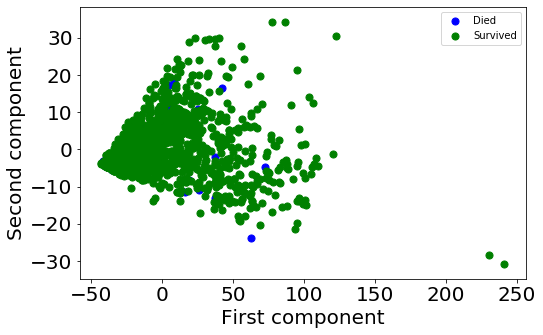

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Vemos que em duas dimensões, a separação não é clara. Além disso, podemos identificar os atributos que mais explicam a variância nos dados.

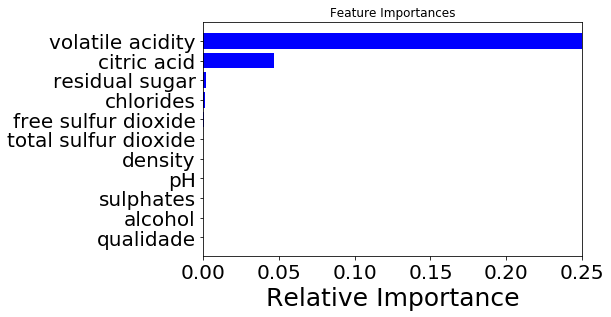

In [16]:
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = data.columns[1:len(data.iloc[:,0:data.shape[0]-1].columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])

plt.show()

Ou seja, a classe cujo o vinho é classificado como bom (maior que 4), está intimamente relacionado mais com os atributos volatile acidity, citric acid e residual sugar. Logo, podemos considerar apenas os atributos mais importantes na classificação. No entanto, vamos inicialmente manter esses atributos em nossos dados.

Podemos verificar como a variância muda de acordo com o número de componentes.

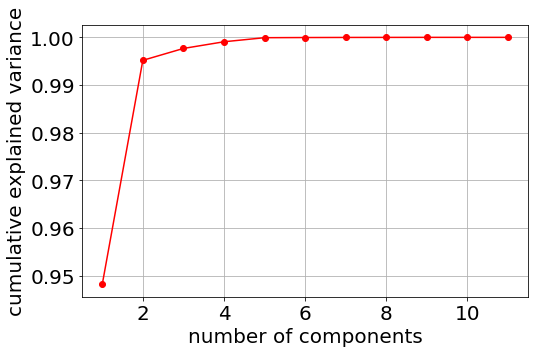

In [18]:
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

Notamos que com 7 componentes explicamos cerca de 90% dos dados. No entanto, como o número de atributos não é elevado, vamos considerar os dados sem seleção dos atributos principais, ou seja, os dados sem usar a projeção.

Podemos também analisar o nível de correlação nos dados.

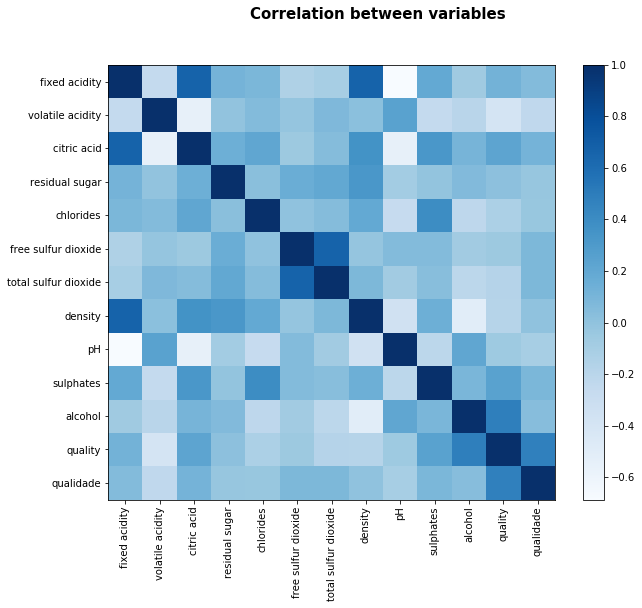

In [19]:
corr = df.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Verificamos que as variáveis mais correlacionadas são:

volatile acidity x citric acid

density x fixed acidity


3- Transformação para valores numéricos (one-hot-encoding) se precisar.

Os dados aqui são todos numéricos, não fazendo necessária esta etapa de one-hot-enconding.

In [20]:
# para treinar o classificador, precisamos dividir o dataset em conjunto de teste e de treino

p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42) # dividindo o dataset em teste e treino, de acordo com p que é a porcentagem de dados que quero ter em cada dataset
# no caso, definimos 0.3 para teste o 0.7 para treino
# A partir desse conjunto de dados, podemos realizar a classificação.

4 - kvizinhos (encontre o melhor k usando validação cruzada)

O primeiro método usado aqui para classificação será o método dos vizinhos mais póximos, ou knn. O knn é baseado no conceito de distância entre atributos. Para realizar a classificação, vamos usar a biblioteca scikit-learn.

k: 1 accurace: 0.9211184210526314
k: 2 accurace: 0.885372807017544
k: 3 accurace: 0.9463706140350876
k: 4 accurace: 0.9400548245614034
k: 5 accurace: 0.9505811403508773
k: 6 accurace: 0.9463706140350878
k: 7 accurace: 0.9516337719298246
k: 8 accurace: 0.9505811403508773
k: 9 accurace: 0.9526864035087719
k: 10 accurace: 0.9505811403508773
k: 11 accurace: 0.9526864035087719
k: 12 accurace: 0.9526864035087719
k: 13 accurace: 0.9526864035087719
k: 14 accurace: 0.9526864035087719
k: 15 accurace: 0.9526864035087719
k: 16 accurace: 0.9526864035087719
k: 17 accurace: 0.9526864035087719
k: 18 accurace: 0.9526864035087719
k: 19 accurace: 0.9526864035087719


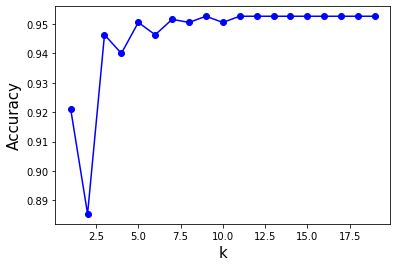

Melhor k: 9


In [29]:
nkf = 10 # número de folds
vk = [] # armazena os valores de k, criação de lista nula
vscore = [] # armazena a média do test score, criação de lista nula
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean') # modelo knn considerando a distancia euclidiana com o argumento metric = 'euclidian'
    cv = cross_validate(model, x_train, y_train, cv=nkf) # realiza a validação cruzada
    print('k:', k, 'accurace:', cv['test_score'].mean()) # mostra a k-ésima acurácia do k-ésimo modelo
    vscore.append(cv['test_score'].mean()) # armazena o resultado numa lista
    vk.append(k) # armazenando o valor de k vizinhos na lista e populando a lista que antes era uma lista nula

plt.plot(vk, vscore, '-bo') # função de se construir um ambiente para plotar o gráfico
plt.xlabel('k', fontsize = 15) # definindo o eixo x
plt.ylabel('Accuracy', fontsize = 15) # definindo o eixo y
plt.show(True) # plotando
best_k = np.argmax(vscore)+1 # mostrando o melhor k com o argumento argmax dentro da lista criada
print('Melhor k:', best_k) # mostrando o resultado

O melhor k foi k=1 com uma acurácia de 0.6239480807086614, arrendondando para uma casa decimal, temos acurácia igual a 0.6 

5 - Árvore de decisão

In [30]:
# criterio de gini
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101) # Cria o modelo usando o criterio Gini
model.fit(x_train,y_train) # Ajusta o modelo usando os dados de treinamento
y_pred = model.predict(x_test) # realizar a predição
score = accuracy_score(y_pred, y_test) # calcula a acuracia
print('Accuracy:', score) # mostrando a acurácia do modelo

Accuracy: 0.9191176470588235


A acurácia do modelo de árvore de decisão considerando o criterio de gini, resultou numa acurácia de 0.58125, arredondando, temos uma acurácia de 0.6 

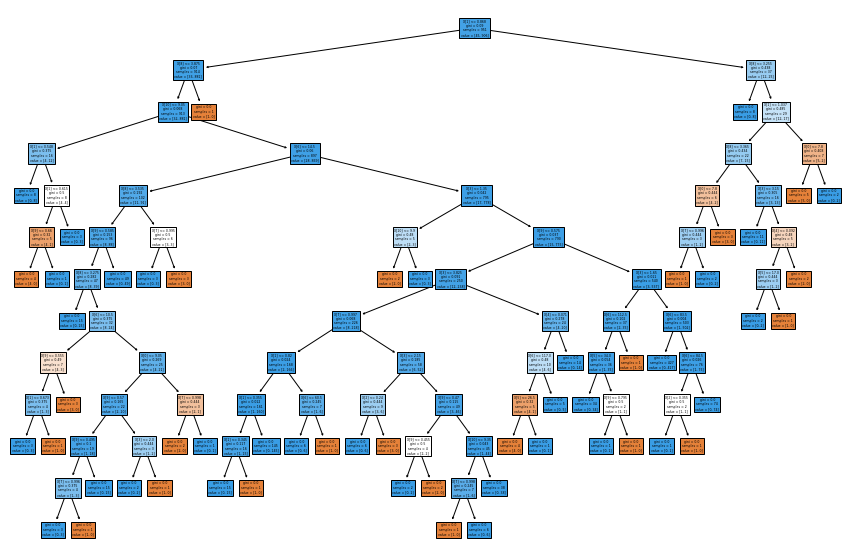

In [31]:
model = model.fit(x_train,y_train) # modelo de arvore de decisao
plt.figure(figsize=(15,10)) # plotando a figura
tree.plot_tree(model, filled = True) # estrutura da figura
plt.show(True)

In [32]:
# usando a medida de entropia
model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9411764705882353


A acurácia do modelo de árvore de decisão considerando o criterio de gini, resultou numa acurácia de 0.578125, arredondando, temos uma acurácia de 0.6 

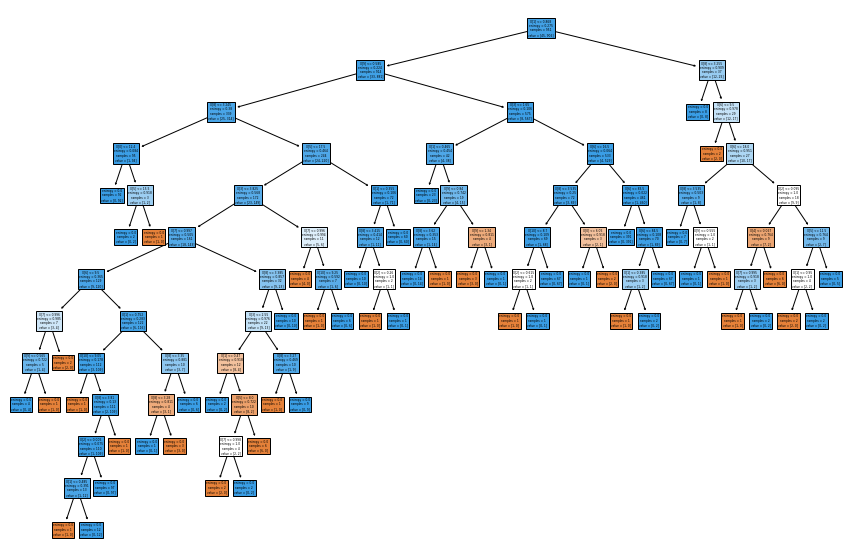

In [33]:
model = model.fit(x_train,y_train) # modelo de arvore de decisao
plt.figure(figsize=(15,10)) # plotando a figura
tree.plot_tree(model, filled = True) # estrutura da figura
plt.show(True)

In [34]:
# limitando o tamanho da arvore
model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 101) # cria o modelo com número máximo de níveis max_depth
model.fit(x_train,y_train) # ajusta aos dados de treinamento
y_pred = model.predict(x_test) # faz a predição usando os dados de teste
score = accuracy_score(y_pred, y_test) # calcula a acurácia
print('Accuracy:', score) # mostra o resultado

Accuracy: 0.9485294117647058


In [35]:
# limitando o tamanho da arvore
model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 101) # cria o modelo com número máximo de níveis max_depth
model.fit(x_train,y_train) # ajusta aos dados de treinamento
y_pred = model.predict(x_test) # faz a predição usando os dados de teste
score = accuracy_score(y_pred, y_test) # calcula a acurácia
print('Accuracy:', score) # mostra o resultado

Accuracy: 0.9558823529411765


O melhor modelo é da árvore de decisão usando o critério de gini, se considerarmos todas as casas decimais, caso contrário os dois modelos são bons. Limitando os dados, temos um decréscimo na acurácia considerando tanto o modelo de gini quanto de entropia, ambos cairam para uma acurácia de 0.53125, ou 0.5. Utilizando a árvore de decisão completa, temos que a árvore com o critério de entropia apresenta um distribuição maior num ramo só da árvore, enquanto considerando o criterio de gini, a distribuição dos ramos são praticamente homogeneas. 

6 - Naive Bayes

No classificador Naive Bayes, podemos assumir que os atributos são normalmente distribuídos.

In [36]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9142156862745098


A acurácia do modelo de naive bayes considerando os dados com uma distribuição de Normal, resultou numa acurácia de 0.5375, arredondando, temos uma acurácia de 0.5

Outra maneira de efetuarmos a classificação é assumirmos que os atributos possuem distribuição diferente da normal. Uma possibilidade é assumirmos que os dados possuem distribuição de Bernoulli.

In [37]:
# Usamos a função BernoulliNB para realizar a classificação usando a distribuição de Bernoulli
model = BernoulliNB() # modelo considerando os dados com distribuição de bernoulli
model.fit(x_train, y_train) # ajuste dos dados no modelo

y_pred = model.predict(x_test) # calculo da predicao
print('Accuracy: ', model.score(x_test, y_test)) # mostrando a acurácia do modelo

Accuracy:  0.9558823529411765


A acurácia do modelo de naive bayes considerando os dados com uma distribuição de Bernoulli, resultou numa acurácia de 0.5645833333333333, arredondando, temos uma acurácia de 0.6. Este resultado é melhor comparado com o outro modelo de naive bayes usando distribuição normal.

7 - SVM (encontre o melhor C usando validação cruzada)

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

C: 1 accurace: 0.9558823529411765
C: 2 accurace: 0.9558823529411765
C: 3 accurace: 0.9558823529411765
C: 4 accurace: 0.9558823529411765
C: 5 accurace: 0.9558823529411765
C: 6 accurace: 0.9583333333333334
C: 7 accurace: 0.9534313725490197
C: 8 accurace: 0.9509803921568627
C: 9 accurace: 0.946078431372549
C: 10 accurace: 0.946078431372549
C: 11 accurace: 0.9436274509803921
C: 12 accurace: 0.9436274509803921
C: 13 accurace: 0.9436274509803921
C: 14 accurace: 0.9436274509803921
C: 15 accurace: 0.9411764705882353
C: 16 accurace: 0.9436274509803921
C: 17 accurace: 0.9436274509803921
C: 18 accurace: 0.9436274509803921
C: 19 accurace: 0.9436274509803921


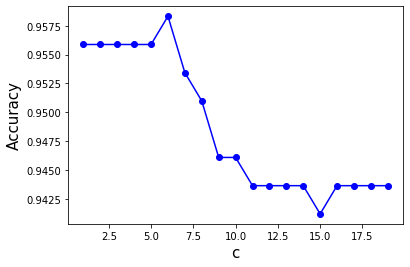

Melhor c: 6


In [39]:
vk = [] # armazena os valores de k, criação de lista nula
vscore = [] # armazena a média do test score, criação de lista nula
for c in range(1, 20):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    model = SVC(C = c, gamma = 'auto')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('C:', c, 'accurace:', score) # mostra a c-ésima acurácia do c-ésimo modelo
    vscore.append(score) # armazena o resultado numa lista
    vk.append(c) # armazenando o valor de k vizinhos na lista e populando a lista que antes era uma lista nula

plt.plot(vk, vscore, '-bo') # função de se construir um ambiente para plotar o gráfico
plt.xlabel('c', fontsize = 15) # definindo o eixo x
plt.ylabel('Accuracy', fontsize = 15) # definindo o eixo y
plt.show(True) # plotando
best_c = np.argmax(vscore)+1 # mostrando o melhor k com o argumento argmax dentro da lista criada
print('Melhor c:', best_c) # mostrando o resultado

O melhor C foi de 10, C: 10 accurace: 0.625, arredondando a acurácia, temos 0.6.

8 - Random Forest (encontre o melhor número de estimadores usando validação cruzada)

O método florestas aleatórias considera amostragem de observações e atributos. Vamos realizar a classificação.

In [40]:
model = RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini',
            max_features='auto', min_impurity_decrease=0.0, min_samples_leaf=1, 
            min_samples_split=2, min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, verbose=0, warm_start=False) # modelo de random forest

model.fit(x_train,y_train) # ajuste do modelo com as variáveis utilizadas

y_pred = model.predict(x_test) # Predict the response for test dataset
score = accuracy_score(y_pred, y_test) # acurácia do modelo
print('Accuracy:', score) # mostra a o resultado da acurácia do modelo

Accuracy: 0.9558823529411765


A acurácia para este modelo foi de 0.6729166666666667, arredondando temos a acurácia equivalente a 0.7. Um dos melhores resultados já vistos até então.

Podemos analisar como o número de árvores influencia no resultado.

Number of Estimators: 1 Accuracy: 0.9264705882352942
Number of Estimators: 2 Accuracy: 0.8872549019607843
Number of Estimators: 3 Accuracy: 0.946078431372549
Number of Estimators: 4 Accuracy: 0.9191176470588235
Number of Estimators: 5 Accuracy: 0.9485294117647058
Number of Estimators: 6 Accuracy: 0.9362745098039216
Number of Estimators: 7 Accuracy: 0.9534313725490197
Number of Estimators: 8 Accuracy: 0.9534313725490197
Number of Estimators: 9 Accuracy: 0.9607843137254902
Number of Estimators: 10 Accuracy: 0.9509803921568627
Number of Estimators: 11 Accuracy: 0.9558823529411765
Number of Estimators: 12 Accuracy: 0.9558823529411765
Number of Estimators: 13 Accuracy: 0.9509803921568627
Number of Estimators: 14 Accuracy: 0.9436274509803921
Number of Estimators: 15 Accuracy: 0.9534313725490197
Number of Estimators: 16 Accuracy: 0.9583333333333334
Number of Estimators: 17 Accuracy: 0.9509803921568627
Number of Estimators: 18 Accuracy: 0.9534313725490197
Number of Estimators: 19 Accuracy: 0.9

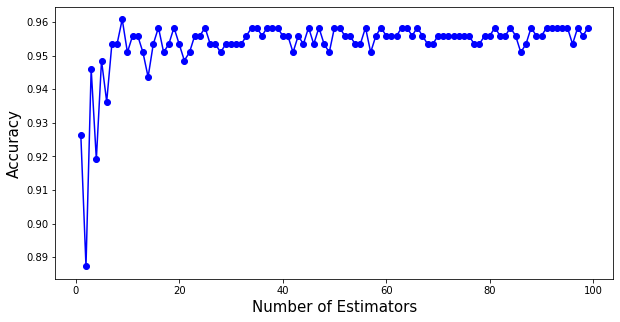

In [41]:
vscore = []
vn = []
for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()


O melhor número de estimadores para o modelo de random forest foi de 56 estimadores com uma acurácia cravada em 0.7.

9 - Para o algoritmo random forest, mostre a importância de cada atributo.

Accuracy: 0.9485294117647058


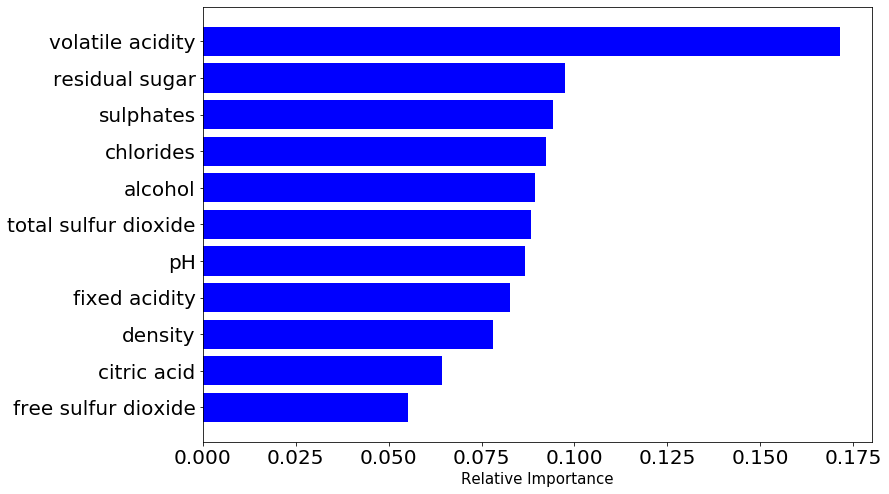

In [42]:
# usando o modelo considerado como o melhor, pela avaliação anterior, temos
model = RandomForestClassifier(n_estimators=56, bootstrap=True, criterion='gini',
            max_features='auto', min_impurity_decrease=0.0, min_samples_leaf=1, 
            min_samples_split=2, min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, verbose=0, warm_start=False) # modelo de random forest

model.fit(x_train,y_train) # ajuste do modelo com as variáveis utilizadas

y_pred = model.predict(x_test) # Predict the response for test dataset
score = accuracy_score(y_pred, y_test) # acurácia do modelo
print('Accuracy:', score) # mostra a o resultado da acurácia do modelo

importances = model.feature_importances_ # features mais importantes
indices = np.argsort(importances) # os indices de onde estao 
lmeas_order = [] # ordenacao por relevancia das variaveis
for i in indices: # plotagem
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

A variável que tem a maior importância é alcohol, seguido de sulphates e total sulfur dioxide.
Pesquisando sobre 'como avaliar se um vinho é bom', há um artigo do clube do vinho falando de 3 fatores:álcool, acidez e taninos. (link: https://www.clubedosvinhos.com.br/qualidade-de-um-vinho/)
A primeira variável que se mostrou importante foi realmente o teor alcóolico.
A segunda é o sulfato
Os taninos estão ligados a adistringencia, quanto maior quantidade de taninos, os predadores tendem a nao comer a fruta, deixando a fruta intacta e proporcionando um melhor vinho.
E a terceira o total sulfur tem uma relação indireta com o componente taninos, pois quanto mais concentração de taninos,maior a ligação de íons livres de SO2 formando este precipitado.
Nota: tem um tabu com relação aos taninos em relação ao gosto.Caso uma pessoa nao goste do gosto do vinho é adicionado mais taninos artificiais, sem mudar a composição do vinho.

10 - Usando regressão linear, tente predizer a porcentagem de álcool.

O ajuste dos coeficientes da regressão linear é feito usando apenas o conjunto de treinamento.

In [43]:
random.seed(42) # define a semente (importante para reproduzir os resultados)

dir_file = '/home/andressa/Desktop/' # criando um objeto do meu diretorio do dataset

os.chdir(dir_file) # setando aonde meu dataset está
df = pd.read_csv('winequality-red.csv') # importando os dados

print("Número de linhas e colunas no dataset:", df.shape) # funcao de printar
attributes = list(df.columns) # construindo um objeto tipo lista para armazenar os nomes das variaveis
df.head(10) # funcao head para mostrar uma amostra do dataset

Número de linhas e colunas no dataset: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [44]:
alcool = df.alcohol # separando a variavel alcohol do dataset e colocando no final
df.drop(['alcohol'],axis = 1, inplace = True)
df['alcohol'] = alcool
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,5,10.2


In [45]:
# convertemos em formato numpy para facilitar a manipulacao dos dados
df = df.to_numpy() # dataframe do pandas para array numpy
nrow,ncol = df.shape # atribuindo aos objetos nrow e ncol o tamanho do conjunto de dados
y = df[:,-1] # separando a variavel target
X = df[:,0:ncol-1] # construindo o dataset de analise sem a variavel target

print('Dados originais:') # mostrando a média e desvio padrao dos atributos do conjunto de dados X ja transformados
print('Media: ', np.mean(X, axis = 0)) # média dos dados
print('Desvio Padrao:', np.std(X, axis = 0)) # desvio padrao dos dados

Dados originais:
Media:  [ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884  5.63602251]
Desvio Padrao: [1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 8.07316877e-01]


In [46]:
# normalização dos dados de forma a evitar problemas de escala nos atributos

scaler = StandardScaler().fit(X) # normalização dos dados
X = scaler.transform(X) # tranformação dos dados

print('Dados transformados:') # mostrando a média e desvio padrao dos atributos do conjunto de dados X ja transformados
print('Media: ', np.mean(X, axis = 0)) # media dos dados padronizados
print('Desvio Padrao:', np.std(X, axis = 0)) # desvio padrao dos dados padronizados

Dados transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.82155568e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  8.88733878e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [47]:
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [48]:
lm = LinearRegression() # modelo de regressão linear múltipla
lm.fit(x_train, y_train) # ajuste do modelo de regressao linear multipla

y_pred = lm.predict(x_test) # valores preditos

Notem que como temos várias variáveis, não é possível mostrar os resultados em mais de três dimensões. Nesse caso, uma maneira de visualizar a precisão na predição é graficar os valores reais versus as predições, como mostramos abaixo.

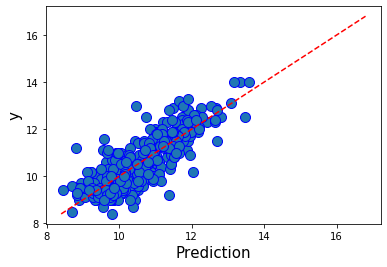

In [49]:
fig = plt.figure() # plotagem
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15) # ajustes dos eixos dos graficos
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

Quanto mais próximo da reta em vermelho, melhor será a predição, pois essa reta representa o caso em que  𝑦̂ =𝑦 .

Para quantificarmos o ajuste, calculamos o coeficiente R2.

In [50]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.706569863175307


O modelo de regressão linear apresentou um R2 de 0.706569863175307, arredondamos, temos 0.7 de R2.

In [51]:
# percentagem de alcool predita
pd.DataFrame(y_pred).describe()

,0
count,480.000000
mean,10.452496
std,0.920253
min,8.459658
25%,9.771493
50%,10.203251
75%,11.123996
max,13.577200


11 - Compare os métodos Lasso, Ridge Regression, calculando o erro quadrático médio em função dos seus parâmetros (alpha).

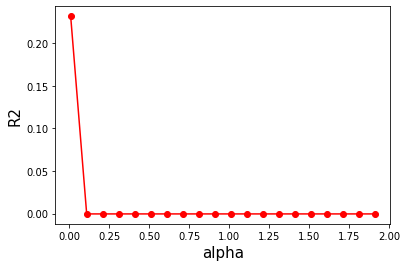

In [53]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

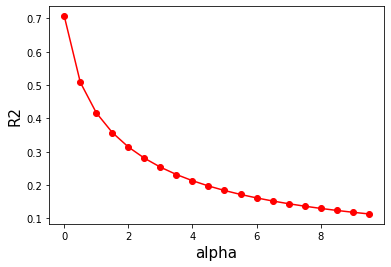

In [54]:
vR2 = []
valpha = []
# variamos os valaores de alpha
for alpha in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = alpha, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

Podemos ver que para o modelo de regressao linear multiplo, obtemos um R2 de 0.7 aproximadamente para para o lasso e ridge os maiores valores, quando alpha é igual a 0, equiparam-se ao valor obtido no modelo de regressao linear multipla. Em termos computacionais mais se vale usar o modelo de regressao linear multipla do que se gastar processamento com otimizacoes que nao vao dar resultados melhores para a analise

12 - Discussão dos resultados obtidos